In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk

In [2]:
# nltk.download_shell()

# Build a spam filter

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no, message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [7]:
messages_df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [8]:
messages_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages_df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages_df['length'] = messages_df['message'].apply(len)

In [12]:
messages_df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

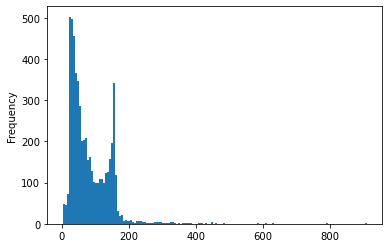

In [13]:
messages_df['length'].plot.hist(bins=150)

In [14]:
messages_df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages_df[messages_df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

(0.0, 200.0)

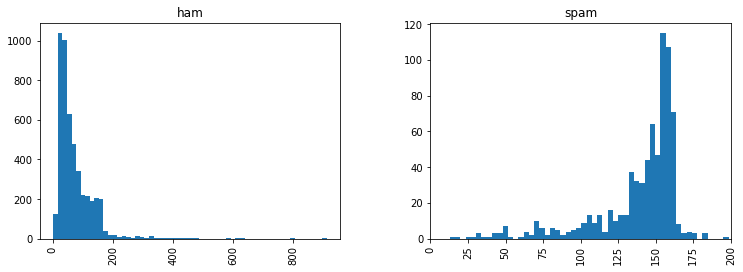

In [16]:
messages_df.hist(column='length',by='label',bins=60,figsize=(12,4))
plt.xlim(0,200)

## Convert raw messages into a sequence of numbers

In [17]:
import string

In [18]:
mess = 'Sample message! Notice: it has punctuation.'


In [19]:
no_punc = [c for c in mess if c not in string.punctuation]

In [20]:
from nltk.corpus import stopwords

In [21]:
stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

In [22]:
no_punc = ''.join(no_punc)

In [23]:
no_punc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [24]:
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [25]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [26]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    no_punc = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return no_punc
    

In [27]:
messages_df['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization - Bag of words model

1. Count how many times a word occurs in each message (term frequency)
2. Weigh the counts so the frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length to abstract from original text length (L2 norm)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages_df['message'])

In [30]:
# of different words after looking at all the words in all of the messages
print(len(bow_transformer.vocabulary_))

11425


In [31]:
mess4 = messages_df['message'][3]

In [32]:
print(mess4)

U dun say so early hor... U c already then say...


In [33]:
bow4 = bow_transformer.transform([mess4])

In [34]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [35]:
print(bow4.shape)

(1, 11425)


In [36]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
messages_bow = bow_transformer.transform(messages_df['message'])

In [38]:
print('Shape of the sparse matrix: ', messages_bow.shape)

Shape of the sparse matrix:  (5572, 11425)


In [39]:
# non zero occurrences
messages_bow.nnz

50548

In [40]:
sparsity = (100.0 * messages_bow.nnz/(messages_bow.shape[0] * messages_bow.shape[1]))
print(F"Sparsity: {sparsity}")

Sparsity: 0.07940295412668218


In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [43]:
tfidf4 = tfidf_transformer.transform(bow4)

In [44]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [45]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [60]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Naive Bayes classifier

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
messages_df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages_df['label'])


In [64]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [65]:
all_predictions = spam_detect_model.predict(messages_tfidf)

## Split training and test data

In [66]:
from sklearn.model_selection import train_test_split

In [72]:
msg_train, msg_test, label_train, label_test = train_test_split(messages_df['message'],messages_df['label'],test_size=0.3)

In [73]:
msg_train

4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
4143    Infact happy new year. How are you where are y...
2252    hope things went well at 'doctors' ;) reminds ...
2650    You might want to pull out more just in case a...
89              Ela kano.,il download, come wen ur free..
                              ...                        
2605    You call times job today ok umma and ask them ...
5330      Dude im no longer a pisces. Im an aquarius now.
953     Beautiful Truth against Gravity.. Read careful...
1475    Friendship is not a game to play, It is not a ...
4697    A guy who gets used but is too dumb to realize...
Name: message, Length: 3900, dtype: object

### Sklearn data processing pipeline feature!!

Saves time doing all the data processing steps

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
# pass in a list of all the steps that we want to do
# tuple of name of what we want to do, then what we want to do
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [74]:
# pass in message data and the pipeline will process everything for us
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fe25b81f430>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [75]:
predictions = pipeline.predict(msg_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1502
        spam       0.70      1.00      0.83       170

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672

